In [38]:
# using Pkg
# Pkg.add("Graphs")
# Pkg.add("GLMakie")
# Pkg.add("GraphMakie")

In [36]:
using Graphs
using GLMakie, GraphMakie
using GraphMakie.NetworkLayout

In [10]:
petersen_graph = [
    0 1 0 0 1 0 1 0 0 0 
    1 0 1 0 0 0 0 1 0 0
    0 1 0 1 0 0 0 0 1 0
    0 0 1 0 1 0 0 0 0 1
    1 0 0 1 0 1 0 0 0 0
    0 0 0 0 1 0 0 1 1 0
    1 0 0 0 0 0 0 0 1 1
    0 1 0 0 0 1 0 0 0 1
    0 0 1 0 0 1 1 0 0 0
    0 0 0 1 0 0 1 1 0 0
]

g = SimpleGraph(petersen_graph)


10×10 Matrix{Int64}:
 0  1  0  0  1  0  1  0  0  0
 1  0  1  0  0  0  0  1  0  0
 0  1  0  1  0  0  0  0  1  0
 0  0  1  0  1  0  0  0  0  1
 1  0  0  1  0  1  0  0  0  0
 0  0  0  0  1  0  0  1  1  0
 1  0  0  0  0  0  0  0  1  1
 0  1  0  0  0  1  0  0  0  1
 0  0  1  0  0  1  1  0  0  0
 0  0  0  1  0  0  1  1  0  0

In [33]:
eigenvalues = sort(adjacency_spectrum(g))
λ = round(max(abs(eigenvalues[1]), eigenvalues[end-1]), digits=3)
println("g is a ($(nv(g)), 3, $(λ))-spectral expander") 

g is a (10, 3, 2.0)-spectral expander


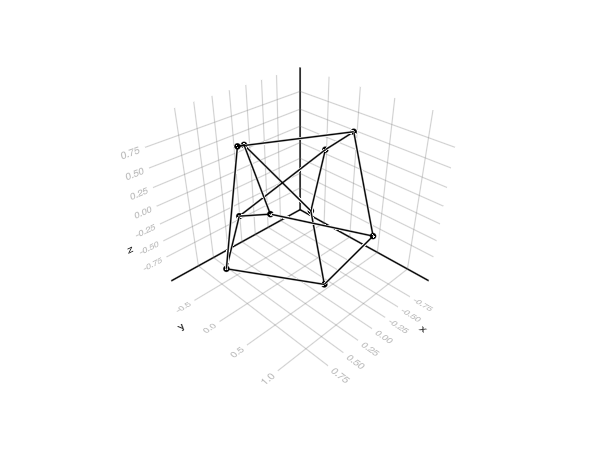

In [37]:
graphplot(g; layout=Stress(; dim=3))

In [ ]:
function double_cover(g):
    """
    Returns double cover of a graph
    """
    n = nv(g)
    # new_graph = zeros(Int8, (2 * n, 2 * n))
    new_graph = cat(a, b; dims=(1, 2))
end
new_graph = cat(petersen_graph, transpose(petersen_graph); dims=(1, 2))

In [ ]:
# now find permutation to get the right one.

perm = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

permuted_matrix = new_graph[:, perm]

println("Permuted Matrix:")
permuted_matrix

double_cover_g = SimpleGraph(permuted_matrix)

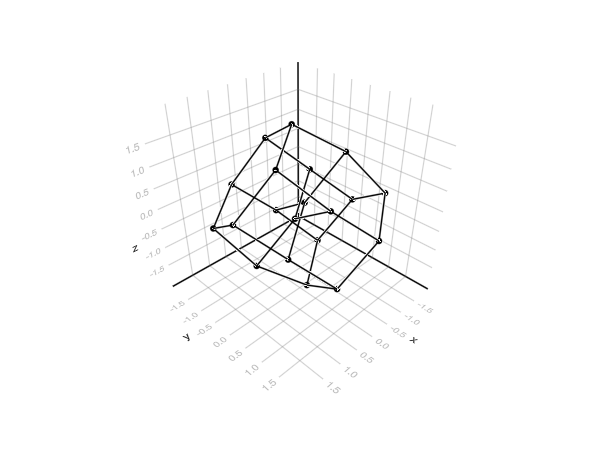

In [53]:
graphplot(double_cover_g; layout=Stress(; dim=3))

In [ ]:
"""
How the labelling works
1 - 10 are from the original graph g
1 - 10 corresp to L in double-cover(g)
11 - 20 corresp to R in double-cover(g)
1 - 20 is R in edge-vertex incidence graph
"""

In [79]:
# We might be able to skip straight to this from the petersen graph

# Now get the edge-vertex incidence graph
R = [1:20]
L = []
for i = 1:10
    for j = 11:20
        # now (i,j) is a vertex in L
        if permuted_matrix[i,j] == 1
            push!(L,(i,j))
            push!(L,(j-10,i+10))
        end
    end
end
println(R)
println(L)
println(length(L))

UnitRange{Int64}[1:20]
Any[(1, 12), (2, 11), (1, 15), (5, 11), (1, 17), (7, 11), (2, 11), (1, 12), (2, 13), (3, 12), (2, 18), (8, 12), (3, 12), (2, 13), (3, 14), (4, 13), (3, 19), (9, 13), (4, 13), (3, 14), (4, 15), (5, 14), (4, 20), (10, 14), (5, 11), (1, 15), (5, 14), (4, 15), (5, 16), (6, 15), (6, 15), (5, 16), (6, 18), (8, 16), (6, 19), (9, 16), (7, 11), (1, 17), (7, 19), (9, 17), (7, 20), (10, 17), (8, 12), (2, 18), (8, 16), (6, 18), (8, 20), (10, 18), (9, 13), (3, 19), (9, 16), (6, 19), (9, 17), (7, 19), (10, 14), (4, 20), (10, 17), (7, 20), (10, 18), (8, 20)]
60


In [ ]:
"""
for each (i,j) in L
    add ((i,j), i) to E
    add ((i,j), j) to E
"""

In [75]:
E = []
for (i,j) in L
    push!(E, ((i,j), i))
    push!(E, ((i,j), j))
end
E

120-element Vector{Any}:
 ((1, 12), 1)
 ((1, 12), 12)
 ((2, 11), 2)
 ((2, 11), 11)
 ((1, 15), 1)
 ((1, 15), 15)
 ((5, 11), 5)
 ((5, 11), 11)
 ((1, 17), 1)
 ((1, 17), 17)
 ((7, 11), 7)
 ((7, 11), 11)
 ((2, 11), 2)
 ⋮
 ((10, 14), 10)
 ((10, 14), 14)
 ((4, 20), 4)
 ((4, 20), 20)
 ((10, 17), 10)
 ((10, 17), 17)
 ((7, 20), 7)
 ((7, 20), 20)
 ((10, 18), 10)
 ((10, 18), 18)
 ((8, 20), 8)
 ((8, 20), 20)

In [81]:
# the ordering and number of an element in L is simply given by its index

# Take local code as the 3 bit repetition code
H = [
    0 1 1
    1 0 1
    1 1 0
]

# Code with block length 2n
two_n = length(L)
message_vector = zeros(Int8, two_n)

60-element Vector{Int8}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0